In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
class_name = 'Attribution-Noncommercial-Share Alike 3.0 United States'
# Load dataset.
tracks = pd.read_csv('data/fma_metadata/tracks_reduced_dataset.csv')
features_to_drop = ['Unnamed: 0']
tracks.drop(features_to_drop, inplace=True, axis=1)

tracks.shape#, genres.shape, features.shape, echonest.shape

(99404, 16)

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score 

In [4]:
#class_name = 'Attribution-NonCommercial-ShareAlike 3.0 International'

attributes = [col for col in tracks.columns if col != class_name]

X = tracks[attributes].values
y = tracks[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [6]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9860170344041311
F1-score [0.9915558  0.95936069]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     24518
           1       0.99      0.93      0.96      5304

    accuracy                           0.99     29822
   macro avg       0.99      0.96      0.98     29822
weighted avg       0.99      0.99      0.99     29822



In [7]:
classification_report(y_test, y_pred, output_dict=True)

{'0': {'precision': 0.9846370400160869,
  'recall': 0.9985724773635696,
  'f1-score': 0.9915557985541583,
  'support': 24518},
 '1': {'precision': 0.9929392777889853,
  'recall': 0.9279788838612368,
  'f1-score': 0.9593606860929734,
  'support': 5304},
 'accuracy': 0.9860170344041311,
 'macro avg': {'precision': 0.988788158902536,
  'recall': 0.9632756806124032,
  'f1-score': 0.9754582423235658,
  'support': 29822},
 'weighted avg': {'precision': 0.9861136367952248,
  'recall': 0.9860170344041311,
  'f1-score': 0.9858297279856476,
  'support': 29822}}

In [8]:
import json
json.dumps(classification_report(y_test, y_pred, output_dict=True))

'{"0": {"precision": 0.9846370400160869, "recall": 0.9985724773635696, "f1-score": 0.9915557985541583, "support": 24518}, "1": {"precision": 0.9929392777889853, "recall": 0.9279788838612368, "f1-score": 0.9593606860929734, "support": 5304}, "accuracy": 0.9860170344041311, "macro avg": {"precision": 0.988788158902536, "recall": 0.9632756806124032, "f1-score": 0.9754582423235658, "support": 29822}, "weighted avg": {"precision": 0.9861136367952248, "recall": 0.9860170344041311, "f1-score": 0.9858297279856476, "support": 29822}}'

In [9]:
json.loads(json.dumps(classification_report(y_test, y_pred, output_dict=True)))

{'0': {'precision': 0.9846370400160869,
  'recall': 0.9985724773635696,
  'f1-score': 0.9915557985541583,
  'support': 24518},
 '1': {'precision': 0.9929392777889853,
  'recall': 0.9279788838612368,
  'f1-score': 0.9593606860929734,
  'support': 5304},
 'accuracy': 0.9860170344041311,
 'macro avg': {'precision': 0.988788158902536,
  'recall': 0.9632756806124032,
  'f1-score': 0.9754582423235658,
  'support': 29822},
 'weighted avg': {'precision': 0.9861136367952248,
  'recall': 0.9860170344041311,
  'f1-score': 0.9858297279856476,
  'support': 29822}}

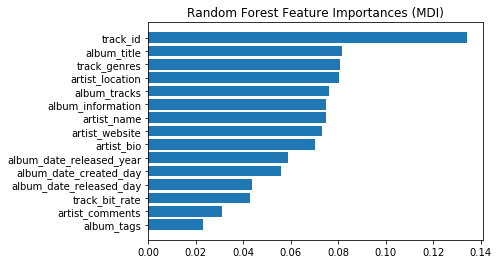

In [10]:
nbr_features = 15
feature_names = attributes

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(feature_names)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [11]:
from sklearn.inspection import permutation_importance

In [12]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

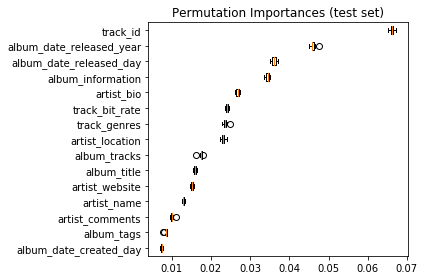

In [13]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [14]:
import pydotplus
from sklearn import tree
from IPython.display import Image

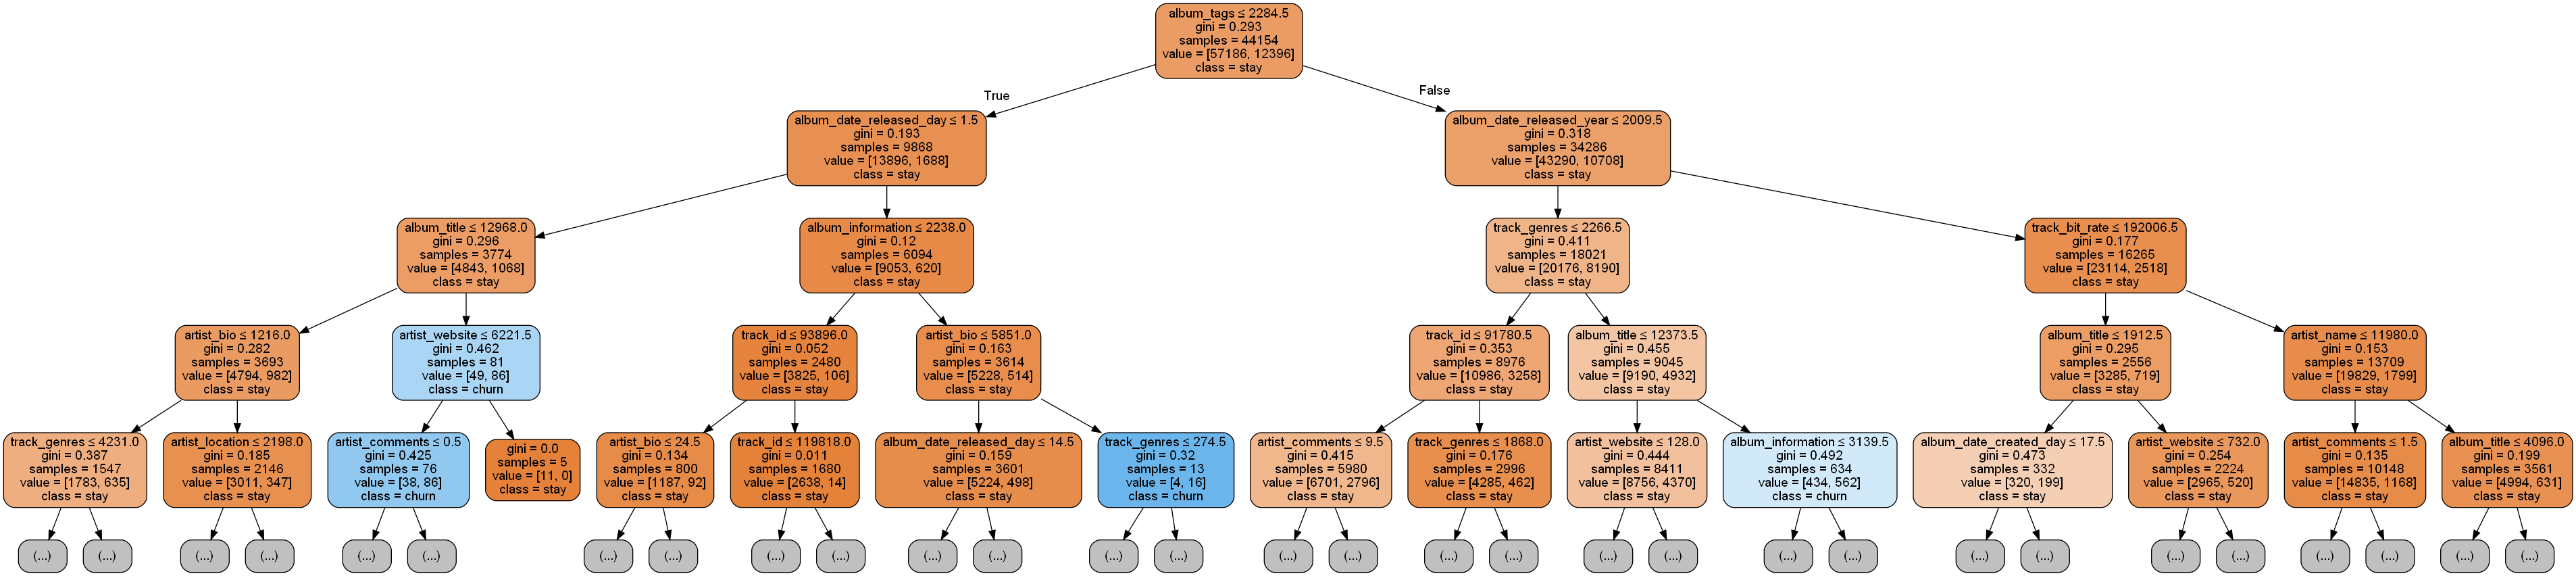

In [15]:
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,  
                                feature_names=feature_names, 
                                class_names=['stay', 'churn'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

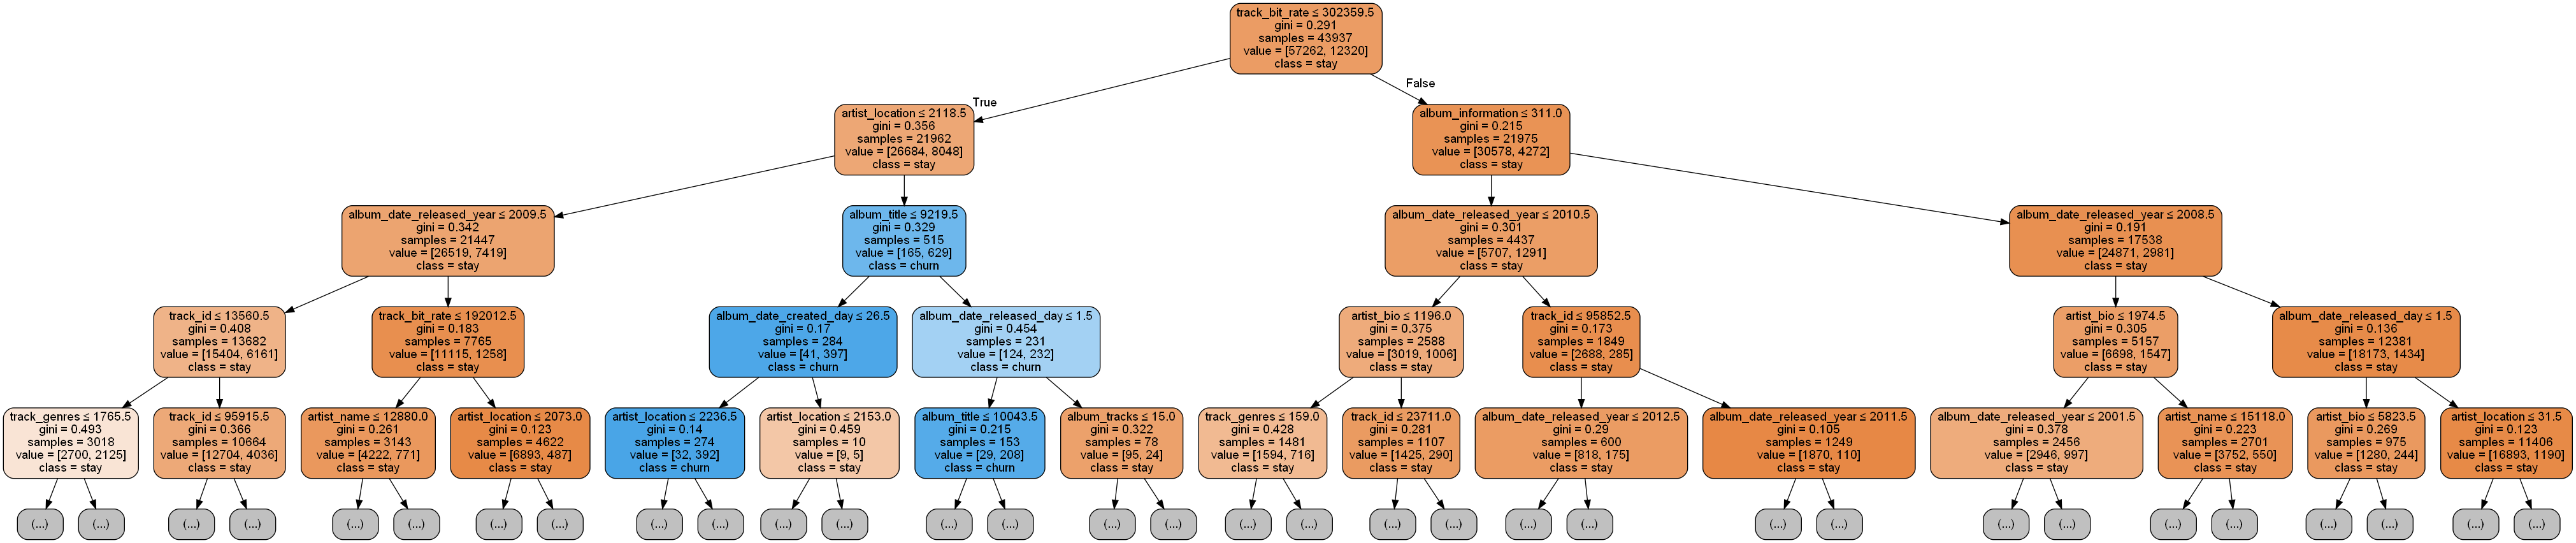

In [16]:
dot_data = tree.export_graphviz(clf.estimators_[1], out_file=None,  
                                feature_names=feature_names, 
                                class_names=['stay', 'churn'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [17]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=4, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9910468781436523
F1-score [0.99457416 0.97441303]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     24518
           1       0.99      0.96      0.97      5304

    accuracy                           0.99     29822
   macro avg       0.99      0.98      0.98     29822
weighted avg       0.99      0.99      0.99     29822



In [18]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9907786198108779
F1-score [0.99441409 0.9735907 ]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     24518
           1       0.99      0.96      0.97      5304

    accuracy                           0.99     29822
   macro avg       0.99      0.98      0.98     29822
weighted avg       0.99      0.99      0.99     29822



In [19]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=4, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8274763597344242
F1-score [0.90500194 0.06198724]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     24518
           1       0.94      0.03      0.06      5304

    accuracy                           0.83     29822
   macro avg       0.88      0.52      0.48     29822
weighted avg       0.85      0.83      0.76     29822



In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
clf = RandomForestClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5)

print('Accuracy %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Accuracy 0.989 +/- 0.001


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [23]:
param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1,3,5,7,9],
             }

grid_search = GridSearchCV(clf, param_grid=param_list, cv=5)
grid_search.fit(X_train, y_train)
random_search = RandomizedSearchCV(clf, param_distributions=param_list, cv=5)
random_search.fit(X_train, y_train)

clf = grid_search.best_estimator_

y_pred = clf.predict(X_test)


print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9907786198108779
F1-score [0.99441386 0.97359578]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     24518
           1       0.99      0.96      0.97      5304

    accuracy                           0.99     29822
   macro avg       0.99      0.98      0.98     29822
weighted avg       0.99      0.99      0.99     29822



In [24]:
grid_search.cv_results_['params'][random_search.cv_results_['rank_test_score'][0]]

{'min_samples_leaf': 3, 'min_samples_split': 5}

In [25]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=20, cv=5)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_


y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9881966333579236
F1-score [0.99286207 0.96592449]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     24518
           1       0.99      0.94      0.97      5304

    accuracy                           0.99     29822
   macro avg       0.99      0.97      0.98     29822
weighted avg       0.99      0.99      0.99     29822



In [26]:
random_search.cv_results_['params'][random_search.cv_results_['rank_test_score'][0]]

{'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': None}

In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [28]:
clf = BaggingClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9909127489772651
F1-score [0.99448795 0.97413875]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     24518
           1       0.99      0.96      0.97      5304

    accuracy                           0.99     29822
   macro avg       0.99      0.98      0.98     29822
weighted avg       0.99      0.99      0.99     29822



In [29]:
clf = BaggingClassifier(base_estimator=SVC(C=1000), n_estimators=10, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8221447253705318
F1-score [0.90239234 0.        ]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     24518
           1       0.00      0.00      0.00      5304

    accuracy                           0.82     29822
   macro avg       0.41      0.50      0.45     29822
weighted avg       0.68      0.82      0.74     29822



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
clf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.988666085440279
F1-score [0.99314346 0.96733668]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     24518
           1       0.99      0.94      0.97      5304

    accuracy                           0.99     29822
   macro avg       0.99      0.97      0.98     29822
weighted avg       0.99      0.99      0.99     29822



In [31]:
from sklearn.ensemble import AdaBoostClassifier

In [32]:
clf = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8420629065790356
F1-score [0.91016594 0.34710286]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     24518
           1       0.66      0.24      0.35      5304

    accuracy                           0.84     29822
   macro avg       0.76      0.60      0.63     29822
weighted avg       0.82      0.84      0.81     29822



In [33]:
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9903091677285226
F1-score [0.99413186 0.97219817]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     24518
           1       0.99      0.95      0.97      5304

    accuracy                           0.99     29822
   macro avg       0.99      0.98      0.98     29822
weighted avg       0.99      0.99      0.99     29822



In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_train_pca
X=X_train_pca

In [7]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier



bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

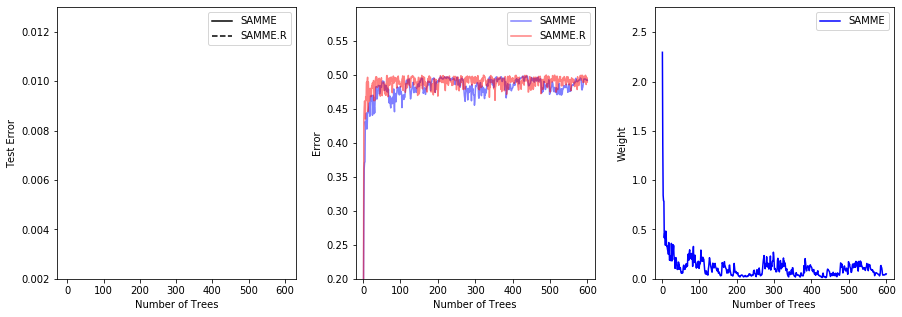

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='black',
         linestyle='dashed', label='SAMME.R')
plt.legend()
plt.ylim(0.002, 0.013)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')

plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='SAMME.R', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
         "b", label='SAMME')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

In [9]:
# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles



# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 1
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min()-1 , X[:, 0].max()+1 
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step/100))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [69582, 99404]

**STACKING**

In [38]:
from sklearn.ensemble import StackingClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [('rf',RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)),
                             ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

Accuracy 0.9902085708537322
F1-score [0.99405586 0.97224335]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     24518
           1       0.98      0.96      0.97      5304

    accuracy                           0.99     29822
   macro avg       0.99      0.98      0.98     29822
weighted avg       0.99      0.99      0.99     29822



In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier

estimators = [('rf',RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)),
                             ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
clf = StackingClassifier( estimators=estimators, final_estimator=MLPClassifier(random_state=0,solver= 'adam', learning_rate_init= 0.01, hidden_layer_sizes=(15)))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

KeyboardInterrupt: 